# Introduction:
* Flipkart stands as a prominent entity within the Indian business landscape, renowned for its extensive array of offerings. 
* Serving as India's premier online marketplace, it caters to a diverse range of consumer needs, spanning from mobile devices, fashion apparel, and electronics to household appliances, books, and groceries. Positioned as a formidable competitor to platforms like Amazon, Flipkart operates as an e-commerce giant, facilitating seamless transactions and robust consumer experiences. 
* Among the myriad applications of data science, sentiment analysis of product reviews on e-commerce platforms emerges as a notable use case, shedding light on consumer sentiments and preferences.

In [1]:
#Importing necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud as wc, STOPWORDS as sw
import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob
import plotly.express as px


In [2]:
#load datasets
df=pd.read_csv("/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv")

In [3]:
#Checking the first 5 values using head method in pandas
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [4]:
#Checking total number of rows and total number of columns in the dataset (df)
#Get dataset shape
df.shape

(205052, 6)

* It means that we have 205052 rows and 6 columns in the datasets

In [5]:
#Checking total null values present in each column
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

* In the review column we have 24664 null values there

<Axes: >

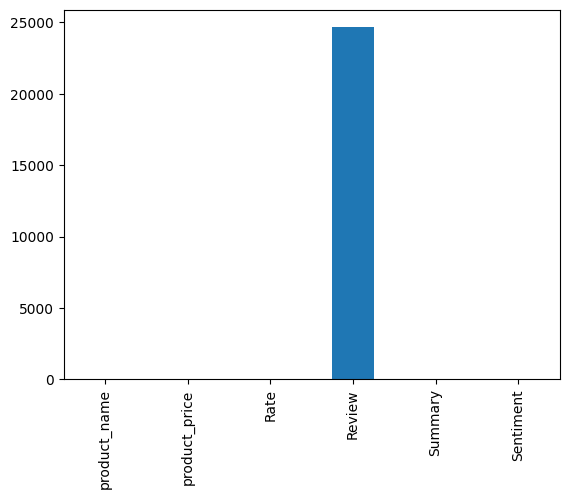

In [6]:
df.isnull().sum().plot(kind="bar")

In [7]:
df.dropna(subset=['Review'],inplace=True)
df.fillna({'Review': ''})
df['Review'].str.replace('[^\w\s]', '').str.lower()




0                  super!
1                 awesome
2                    fair
3         useless product
4                    fair
               ...       
205047          must buy!
205048             super!
205049               nice
205050          just wow!
205051    value-for-money
Name: Review, Length: 180388, dtype: object

<Axes: >

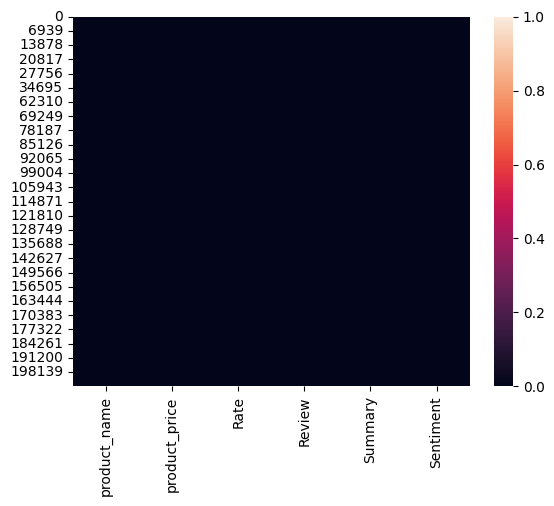

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.shape

(180388, 6)

* Now,We have cleaned data with no null values present in the dataset df
* we have 180388 rows and 6 columns


In [10]:
#Get summary Statistics
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,180388,180388,180388,180388,180379,180388
unique,841,479,8,1324,85306,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,105647,9016,15146,147176


In [11]:
# Data Analysis
df['Review'].nunique()

1324

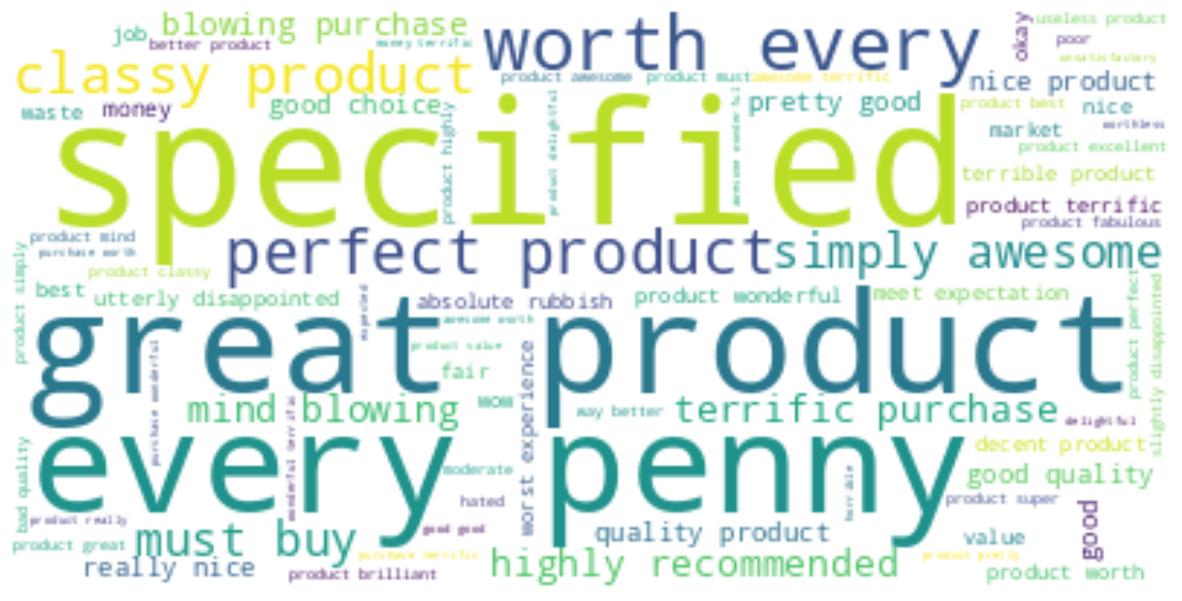

In [12]:
text = " ".join(review for review in df.Review)

# Define stopwords
stopwords = set(sw)
wordcloud = wc(stopwords=stopwords, background_color="white").generate_from_text(text)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<BarContainer object of 3 artists>

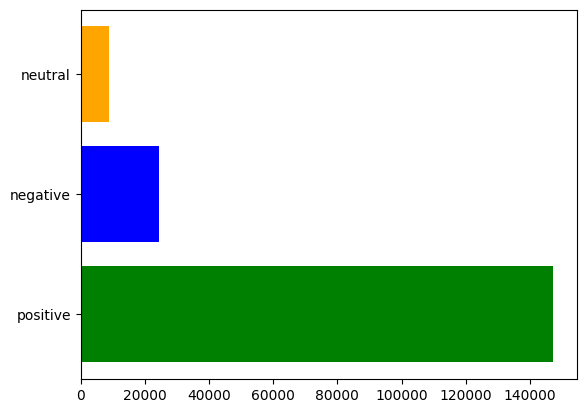

In [13]:
N=df['Sentiment'].value_counts()
s=df['Sentiment'].unique()
plt.barh(s,N,color={'green','orange','blue'})

In [14]:
ratings = df["Rate"].value_counts()
numbers = ratings.index
quantity = ratings.values

figure = px.pie(df, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()


In [15]:

# Define a function to calculate sentiment scores
def calculate_sentiment(review):
    # Perform sentiment analysis using TextBlob
    sentiment = TextBlob(review)
    # Assign polarity scores
    positive = sentiment.sentiment.polarity if sentiment.sentiment.polarity > 0 else 0
    negative = -sentiment.sentiment.polarity if sentiment.sentiment.polarity < 0 else 0
    neutral = 1 - positive - negative
    return positive, negative, neutral

# Apply sentiment analysis function to each review in the dataset
df["Positive"], df["Negative"], df["Neutral"] = zip(*df["Review"].apply(calculate_sentiment))

# Select only relevant columns
df1 = df[["Review", "Positive", "Negative", "Neutral"]]

# Print the first few rows of the DataFrame
print(df1.head())


            Review  Positive  Negative   Neutral
0           super!  0.416667       0.0  0.583333
1          awesome  1.000000       0.0  0.000000
2             fair  0.700000       0.0  0.300000
3  useless product  0.000000       0.5  0.500000
4             fair  0.700000       0.0  0.300000


In [16]:
x = sum(df1["Positive"])
y = sum(df1["Negative"])
z = sum(df1["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


* Most of the reviews are netural that mean total positive and total negatives are less than Total neutral,We check the total scores to decide the conclusion

In [17]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  81381.5475173132
Negative:  10256.429466089967
Neutral:  88750.02301659112


# Conclusion:
* Based on the sentiment analysis of the reviews, it appears that the majority of customers provide neutral feedback, while a smaller fraction of customers express negative sentiments. This suggests overall satisfaction with Flipkart's products and services.